# 8. 자율 주행 보조 시스템 만들기

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image, ImageDraw

print('=3')

=3


In [2]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.models import load_model
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

gpu = '0'
setup_gpu(gpu)

dir_path = os.getenv('HOME') + '/aiffel/object_detection/'
model_path = os.path.join(dir_path, 'snapshots', 'resnet50_csv_10_infer.h5')
model = load_model(model_path, backbone_name='resnet50')

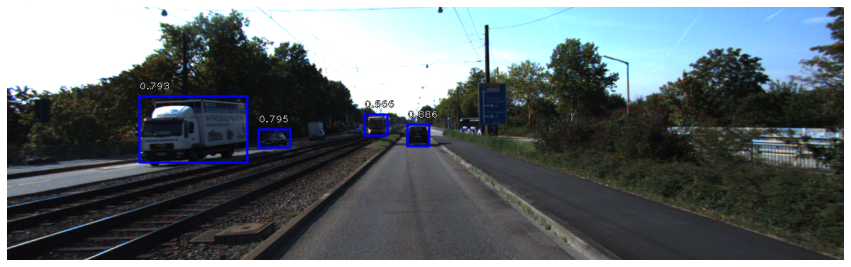

In [28]:
import os
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_1.png'




# inference_on_image 함수를 구현해 주세요.
def inference_on_image(model, img_path, visualize=True):
    
    near_car = 0
    near_person = 0

    image = read_image_bgr(img_path)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    color_map = {
        0: (0, 0, 255), # blue
        1: (255, 0, 0) # red
    }

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    # correct for image scale
    boxes /= scale

    # display images
    if  visualize:
        for box, score, label in zip(boxes[0], scores[0], labels[0]):
            
            if score < 0.5:
                break
                
            if (box[2]- box[0]) > 300 or  (box[3]- box[1]) > 300:
                near_car += 1
            if label == 1:
                near_person += 1
                
            b = box.astype(int)
            
            draw_box(draw, b, color=color_map[label])

            caption = "{:.3f}".format(score)
            draw_caption(draw, b, caption)

        plt.figure(figsize=(15, 15))
        plt.axis('off')
        plt.imshow(draw)
        plt.show()      
    
    return near_car, near_person
    
car_num, person_num = inference_on_image(model, img_path)

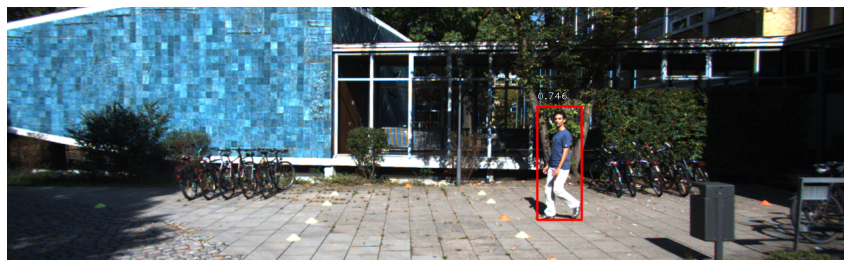

num of near car :  0
num of near person :  1
Stop


In [44]:
img_path3 = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_1.png'

def self_drive_assist(img_path, size_limit=300):
    car_num, person_num = inference_on_image(model, img_path)
    
    print("num of near car : ",car_num)
    print("num of near person : ", person_num)
    
    if car_num > 0  or person_num > 0:
        return "Stop"
    else:
        return "Go"
    


print(self_drive_assist(img_path3))

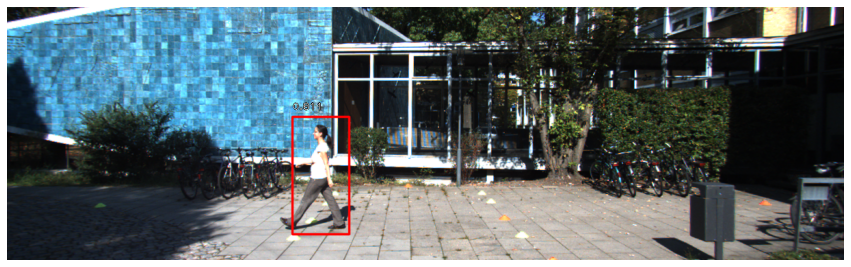

num of near car :  0
num of near person :  1
Stop


In [45]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_2.png'
print(self_drive_assist(img_path))

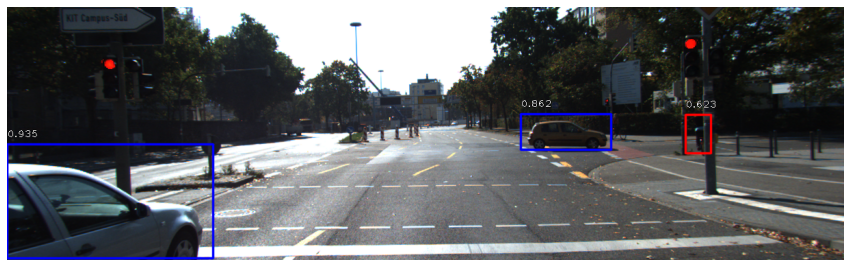

num of near car :  1
num of near person :  1
Stop


In [46]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_3.png'
print(self_drive_assist(img_path))

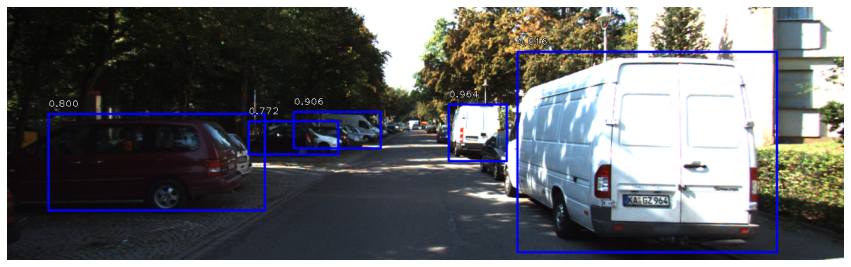

num of near car :  2
num of near person :  0
Stop


In [47]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_4.png'
print(self_drive_assist(img_path))

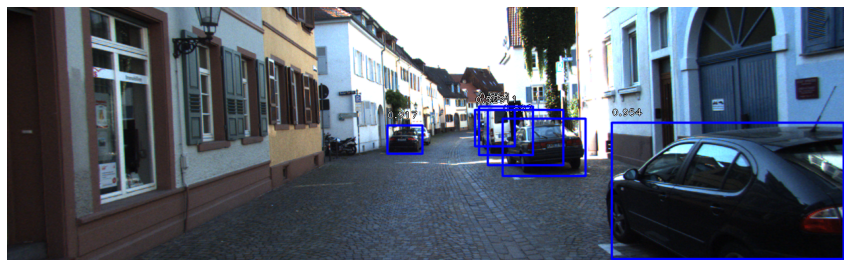

num of near car :  1
num of near person :  0
Stop


In [48]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_5.png'
print(self_drive_assist(img_path))

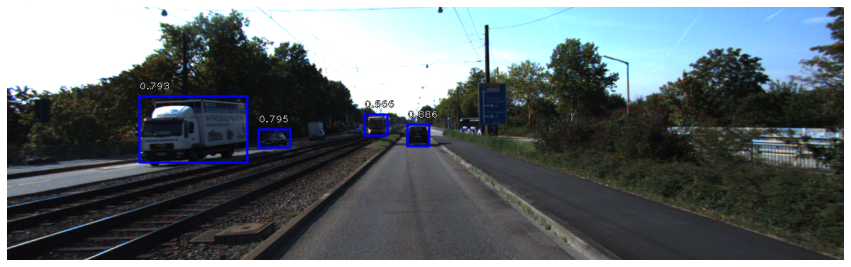

num of near car :  0
num of near person :  0
Go


In [49]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_1.png'
print(self_drive_assist(img_path))

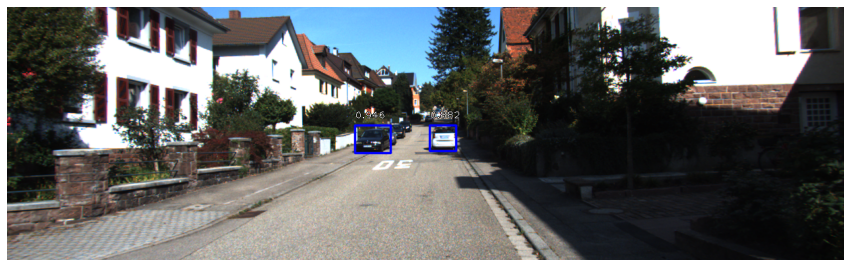

num of near car :  0
num of near person :  0
Go


In [50]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_2.png'
print(self_drive_assist(img_path))

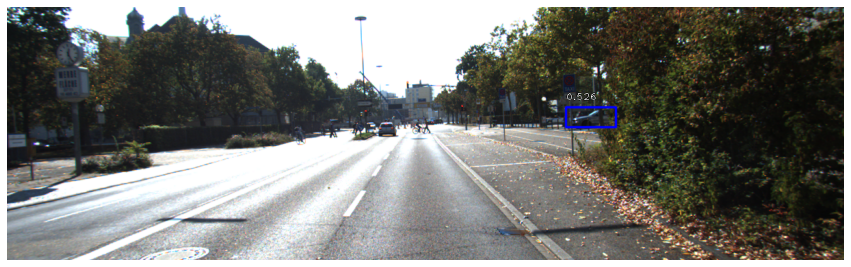

num of near car :  0
num of near person :  0
Go


In [51]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_3.png'
print(self_drive_assist(img_path))

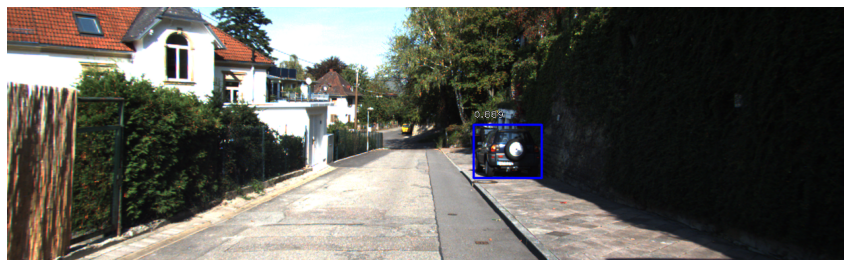

num of near car :  0
num of near person :  0
Go


In [52]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_4.png'
print(self_drive_assist(img_path))

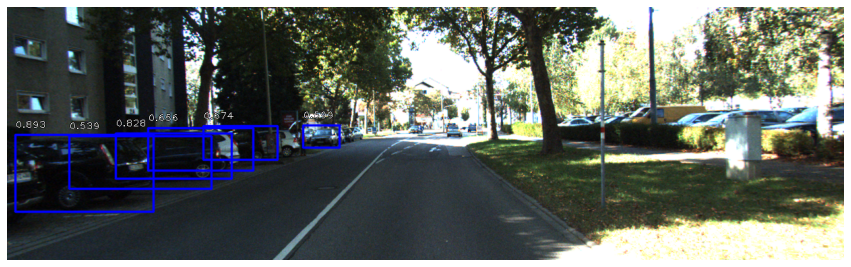

num of near car :  0
num of near person :  0
Go


In [53]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/go_5.png'
print(self_drive_assist(img_path))